Seasonality experimentation

In [10]:
strat_univ = ['BTCUSDT', 'ETHUSDT', 'ADAUSDT', 'BNBUSDT', 'XRPUSDT', 'DOTUSDT', 'MATICUSDT']

# Load And Structure Data

In [11]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

In [12]:
data_freq = '4h'
look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6
start_datetime = '2020-01-01 00:00:00'

In [13]:
px_data = get_price_data_for_universe(data_freq, start_datetime)

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.


In [14]:
px_data

{'BTCUSDT':                                open            high             low  \
 open_time                                                             
 2020-01-01 00:00:00   7180.46000000   7238.03000000   7175.62000000   
 2020-01-01 04:00:00   7226.19000000   7231.70000000   7196.20000000   
 2020-01-01 08:00:00   7209.50000000   7231.17000000   7181.17000000   
 2020-01-01 12:00:00   7193.32000000   7244.43000000   7193.32000000   
 2020-01-01 16:00:00   7237.54000000   7245.54000000   7215.51000000   
 ...                             ...             ...             ...   
 2025-02-21 20:00:00  95300.01000000  96216.79000000  94961.72000000   
 2025-02-22 00:00:00  96218.96000000  96399.99000000  95818.94000000   
 2025-02-22 04:00:00  96182.01000000  96523.77000000  96182.01000000   
 2025-02-22 08:00:00  96386.26000000  96540.01000000  96203.20000000   
 2025-02-22 12:00:00  96562.71000000  96935.76000000  96529.41000000   
 
                               close       volume  

In [15]:
px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close).astype(float)
px_close.index.rename("datetime", inplace=True)

px_close

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
datetime,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN
...,...,...,...,...,...,...,...
2025-02-21 20:00:00,96216.79,2658.39,0.76230,647.3900,2.56880,5.058,NaN
2025-02-22 00:00:00,96331.96,2676.10,0.76300,650.9000,2.56870,5.134,NaN
2025-02-22 04:00:00,96433.96,2686.17,0.76350,654.4100,2.58610,5.118,NaN


In [16]:
(365 * 5 + 2) * 6 + 31 * 6 + 18 * 6 + 3

11259

###########################################################################

Comparison of consecutive returns per week:

In [55]:
df_4h_returns = px_close / px_close.shift() - 1
df_4h_returns

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT
datetime,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN
...,...,...,...,...,...,...,...
2025-02-21 20:00:00,0.009361,0.005617,0.009936,0.018694,0.018880,0.017911,NaN
2025-02-22 00:00:00,0.001197,0.006662,0.000918,0.005422,-0.000039,0.015026,NaN
2025-02-22 04:00:00,0.001059,0.003763,0.000655,0.005393,0.006774,-0.003116,NaN


In [70]:
def get_interval_returns(df_returns):
    weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    df_returns[(df_returns.index.weekday == 1) & (df_returns.index.hour == 0)].mean()

    return_data = {"mean": [], "std dev": []}
    indices = []
    for weekday in range(7):
        for hour in range(0, 24, 4):
            cross_section_data = df_returns[
                (df_returns.index.weekday == weekday) & (df_returns.index.hour == hour)]
            return_data["mean"].append(cross_section_data.mean())
            return_data["std dev"].append(cross_section_data.std())
            indices.append((weekday_names[weekday], hour))

    return (pd.DataFrame(return_data["mean"],
                         index=pd.MultiIndex.from_tuples(indices, names=["weekday", "hour"])),
            pd.DataFrame(return_data["std dev"],
                        index=pd.MultiIndex.from_tuples(indices, names=["weekday", "hour"])))

In [71]:
interval_4h_returns, interval_4h_std = get_interval_returns(df_4h_returns)
interval_4h_returns

BTCUSDT   ETHUSDT   ADAUSDT   BNBUSDT       XRPUSDT  \
weekday   hour                                                         
Monday    0    -0.000764 -0.002378 -0.001744 -0.002585 -5.087368e-04   
          4     0.001107  0.001835  0.002074  0.001496 -5.012009e-04   
          8    -0.000905 -0.000662 -0.002445  0.000267 -4.979929e-07   
          12    0.002928  0.003118  0.001695  0.001140  5.511471e-03   
          16    0.000175  0.000214  0.000498 -0.000340  5.048188e-03   
          20    0.002366  0.003667  0.002069  0.002012  2.407400e-03   
Tuesday   0     0.000076 -0.001316  0.000672  0.000742 -7.819343e-04   
          4     0.000692  0.001171  0.002521  0.001984 -1.411051e-03   
          8     0.000603  0.000982  0.000200  0.001035  1.337102e-04   
          12   -0.001196 -0.002335 -0.002028 -0.001238 -3.297286e-03   
          16    0.000183  0.000007 -0.001028 -0.000259  4.109506e-03   
          20    0.001324  0.000806  0.001903  0.002297 -6.941593e-04   
Wednesday 0     0.000052  0.000437 -0.000727  0.000541 -1.524694e-03   
          4     0.000868  0.000971  0.002252  0.002277 -1.021167e-03   
          8     0.001194  0.000883  0.000757  0.000761  2.019012e-03   
          12    0.001403  0.000966  0.000652 -0.000567 -2.676065e-05   
          16    0.000405  0.001590  0.001550  0.001030  1.979086e-03   
          20    0.000928  0.000994  0.001493  0.000978  7.898346e-04   
Thursday  0    -0.000784 -0.000717 -0.000622 -0.000992 -4.137898e-04   
          4     0.000556  0.000658  0.001664  0.001619 -2.619847e-03   
          8    -0.000107 -0.000124 -0.000484  0.000555  1.298049e-03   
          12    0.000733  0.001499  0.000465  0.000595  6.671368e-04   
          16   -0.000563 -0.000171 -0.000636 -0.001714  1.472538e-04   
          20   -0.001010 -0.001517 -0.000707 -0.000022  1.809448e-03   
Friday    0    -0.000259  0.000680  0.001415  0.000856  5.930966e-04   
          4    -0.000642 -0.000754 -0.000014  0.000466 -1.809310e-03   
          8     0.001950  0.001510  0.002783  0.001556  4.707776e-03   
          12   -0.000222 -0.000155 -0.000512 -0.000141 -2.292325e-03   
          16    0.000075  0.000151 -0.000387  0.000623  2.229316e-03   
          20    0.001003  0.000652  0.001761  0.001400  9.503449e-04   
Saturday  0     0.000402  0.001470  0.003392  0.001199  2.145132e-03   
          4    -0.000831 -0.000511  0.000458  0.000709  1.781855e-03   
          8    -0.000083 -0.000448  0.000946  0.000952  1.220180e-03   
          12    0.001226  0.001771  0.001431  0.000188  3.394569e-03   
          16    0.000187  0.000334 -0.000307 -0.001131  2.001665e-04   
          20   -0.000007  0.000722  0.001683  0.000689 -9.257450e-04   
Sunday    0    -0.000336 -0.000837 -0.000901 -0.000350 -1.050583e-04   
          4     0.000797  0.001367  0.002680  0.001791  1.044242e-03   
          8    -0.000256 -0.000454 -0.000640  0.000367 -3.091371e-03   
          12   -0.001012 -0.000560 -0.002497 -0.001093 -3.941303e-04   
          16    0.000323  0.000821  0.000118  0.000828 -9.120265e-05   
          20    0.000926  0.001263  0.000004  0.000715 -2.402075e-03   

                 DOTUSDT  MATICUSDT  
weekday   hour                       
Monday    0    -0.003629  -0.003282  
          4    -0.000214   0.000737  
          8    -0.001910  -0.001764  
          12    0.001495   0.002162  
          16   -0.001098  -0.000467  
          20    0.002877   0.002771  
Tuesday   0    -0.000851   0.000509  
          4     0.000129   0.000684  
          8     0.000374   0.000205  
          12   -0.003572  -0.004397  
          16   -0.002198  -0.002066  
          20    0.000850   0.002000  
Wednesday 0    -0.000909  -0.000579  
          4     0.000878   0.000178  
          8     0.000691   0.001246  
          12   -0.000998  -0.002238  
          16    0.000561  -0.001117  
          20   -0.000405   0.001784  
Thursday  0    -0.001005  -0.000609  
          4     0.000448   0.001125  
          8 

In [74]:
pd.concat([interval_4h_returns["BTCUSDT"].sort_values(ascending=False).iloc[:5],
           interval_4h_returns["BTCUSDT"].sort_values(ascending=False).iloc[-5:]])

weekday    hour
Monday     12      0.002928
           20      0.002366
Friday     8       0.001950
Wednesday  12      0.001403
Tuesday    20      0.001324
Saturday   4      -0.000831
Monday     8      -0.000905
Thursday   20     -0.001010
Sunday     12     -0.001012
Tuesday    12     -0.001196
Name: BTCUSDT, dtype: float64

In [60]:
interval_4h_returns["ETHUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Monday     20      0.003667
           12      0.003118
           4       0.001835
Saturday   12      0.001771
Wednesday  16      0.001590
Name: ETHUSDT, dtype: float64

In [61]:
interval_4h_returns["ADAUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Saturday   0       0.003392
Friday     8       0.002783
Sunday     4       0.002680
Tuesday    4       0.002521
Wednesday  4       0.002252
Name: ADAUSDT, dtype: float64

In [62]:
interval_4h_returns["BNBUSDT"].sort_values(ascending=False).iloc[:5]

weekday    hour
Tuesday    20      0.002297
Wednesday  4       0.002277
Monday     20      0.002012
Tuesday    4       0.001984
Sunday     4       0.001791
Name: BNBUSDT, dtype: float64

In [63]:
interval_4h_returns["XRPUSDT"].sort_values(ascending=False).iloc[:5]

weekday   hour
Monday    12      0.005511
          16      0.005048
Friday    8       0.004708
Tuesday   16      0.004110
Saturday  12      0.003395
Name: XRPUSDT, dtype: float64

In [72]:
df_8h_returns = px_close / px_close.shift(2) - 1
interval_8h_returns, interval_8h_std = get_interval_returns(df_8h_returns)
interval_8h_returns

BTCUSDT   ETHUSDT   ADAUSDT   BNBUSDT   XRPUSDT   DOTUSDT  \
weekday   hour                                                               
Monday    0     0.000175 -0.001091 -0.001739 -0.001835 -0.002913 -0.005909   
          4     0.000347 -0.000553  0.000281 -0.001086 -0.001034 -0.003886   
          8     0.000264  0.001240 -0.000329  0.001832 -0.000483 -0.002129   
          12    0.001969  0.002413 -0.000887  0.001380  0.005347 -0.000484   
          16    0.003061  0.003281  0.002126  0.000768  0.010599  0.000389   
          20    0.002536  0.003906  0.002584  0.001682  0.007432  0.001762   
Tuesday   0     0.002451  0.002330  0.002742  0.002729  0.001766  0.002030   
          4     0.000688 -0.000210  0.003075  0.002617 -0.002223 -0.000679   
          8     0.001393  0.002262  0.002816  0.003138 -0.001442  0.000462   
          12   -0.000648 -0.001505 -0.001962 -0.000346 -0.003238 -0.003232   
          16   -0.001030 -0.002401 -0.003073 -0.001588  0.000653 -0.005756   
          20    0.001450  0.000700  0.000815  0.001964  0.003339 -0.001394   
Wednesday 0     0.001366  0.001222  0.001179  0.002838 -0.002190 -0.000103   
          4     0.000930  0.001419  0.001556  0.002921 -0.002583 -0.000066   
          8     0.002068  0.001875  0.002999  0.002990  0.001060  0.001557   
          12    0.002613  0.001851  0.001411  0.000214  0.002064 -0.000291   
          16    0.001780  0.002527  0.002133  0.000449  0.001930 -0.000476   
          20    0.001357  0.002671  0.003089  0.002019  0.002898  0.000260   
Thursday  0     0.000125  0.000218  0.000797 -0.000073  0.000293 -0.001426   
          4    -0.000210 -0.000011  0.001306  0.000704 -0.002783 -0.000559   
          8     0.000493  0.000624  0.001300  0.002256 -0.001192  0.000485   
          12    0.000626  0.001338 -0.000276  0.001016  0.001539 -0.001130   
          16    0.000192  0.001335 -0.000111 -0.001124  0.000846 -0.002292   
          20   -0.001574 -0.001678 -0.001292 -0.001736  0.001813 -0.002396   
Friday    0    -0.001329 -0.000969  0.000591  0.000895  0.002372  0.000392   
          4    -0.000898 -0.000074  0.001405  0.001329 -0.001312  0.000964   
          8     0.001290  0.000784  0.002780  0.002022  0.002960  0.002741   
          12    0.001676  0.001271  0.002125  0.001345  0.002230  0.002705   
          16   -0.000129  0.000033 -0.000829  0.000530  0.000812 -0.002246   
          20    0.001086  0.000804  0.001386  0.002031  0.003173 -0.000857   
Saturday  0     0.001399  0.002094  0.005170  0.002574  0.003109  0.003265   
          4    -0.000431  0.000959  0.003874  0.001893  0.003947  0.002665   
          8    -0.000925 -0.000970  0.001369  0.001634  0.003059  0.000579   
          12    0.001135  0.001316  0.002375  0.001089  0.004712  0.000884   
          16    0.001421  0.002131  0.001169 -0.000920  0.003650  0.001565   
          20    0.000163  0.001011  0.001359 -0.000483 -0.000786  0.001517   
Sunday    0    -0.000343 -0.000132  0.000834  0.000329 -0.001021  0.000472   
          4     0.000438  0.000483  0.001729  0.001393  0.000851  0.000604   
          8     0.000538  0.000914  0.002049  0.002192 -0.002061  0.001211   
          12   -0.001288 -0.001030 -0.003172 -0.000742 -0.003537  0.000012   
          16   -0.000689  0.000264 -0.002391 -0.000263 -0.000521  0.000659   
          20    0.001245  0.002081  0.000094  0.001549 -0.002459 -0.001076   

                MATICUSDT  
weekday   hour             
Monday    0     -0.005279  
          4     -0.002475  
          8     -0.000967  
          12     0.000285  
          16     0.001748  
          20     0.002282  
Tuesday   0      0.003287  
          4      0.001215  
          8      0.000861  
          12    -0.004221  
          16    -0.006470  
          20    -0.000078  
Wednesday 0      0.001374  
          4     -0.000419  
          8      0.001417  
          12    -0.000957  
          16    -0.003377  
          20     0.000752  
Thursday  0      0.00119

<Axes: xlabel='datetime'>

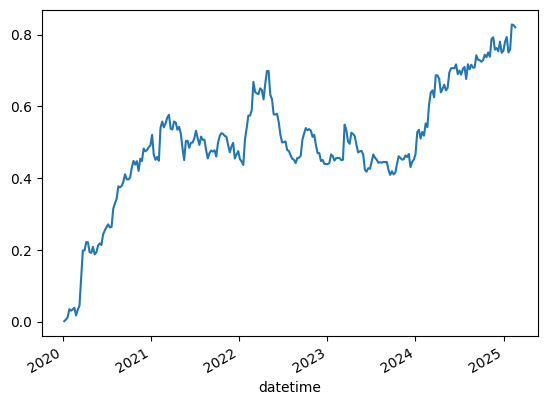

In [123]:
df_8h_returns[(df_8h_returns.index.weekday == 0) & (df_8h_returns.index.hour == 16)]["BTCUSDT"].cumsum().plot()

In [69]:
interval_8h_returns["BTCUSDT"].sort_values(ascending=False).iloc[:5] * 52

weekday    hour
Monday     16      0.159181
Wednesday  12      0.135885
Monday     20      0.131865
Tuesday    0       0.127452
Wednesday  8       0.107531
Name: BTCUSDT, dtype: float64

In [131]:
# df_holdings = pd.DataFrame(0.0, columns=px_close.columns, index=px_close.index)
# df_holdings

bankroll_data = {'cash': [], 'BTCUSDT shares': []}
has_coin_holding = False

for time_index in px_close.index:
    if len(bankroll_data['cash']) == 0:
        bankroll_data['cash'].append(100.0)
        bankroll_data['BTCUSDT shares'].append(0.0)
    elif time_index.weekday() == 0 and time_index.hour == 8:
        bankroll_data['BTCUSDT shares'].append(bankroll_data['cash'][-1] / px_close.loc[time_index, 'BTCUSDT'])
        bankroll_data['cash'].append(0.0)
        has_coin_holding = True
    elif time_index.weekday() == 0 and time_index.hour == 16 and has_coin_holding:
        bankroll_data['cash'].append(px_close.loc[time_index, 'BTCUSDT'] * bankroll_data['BTCUSDT shares'][-1])
        bankroll_data['BTCUSDT shares'].append(0.0)
        has_coin_holding = False
    else:
        bankroll_data['BTCUSDT shares'].append(bankroll_data['BTCUSDT shares'][-1])
        bankroll_data['cash'].append(bankroll_data['cash'][-1])

bankroll_df = pd.DataFrame(bankroll_data, index=px_close.index)
bankroll_df

,cash,BTCUSDT shares
datetime,,
2020-01-01 00:00:00,100.000000,0.0
2020-01-01 04:00:00,100.000000,0.0
2020-01-01 08:00:00,100.000000,0.0
2020-01-01 12:00:00,100.000000,0.0
2020-01-01 16:00:00,100.000000,0.0
...,...,...
2025-02-21 20:00:00,209.265353,0.0
2025-02-22 00:00:00,209.265353,0.0
2025-02-22 04:00:00,209.265353,0.0


In [132]:
portfolio_ser = bankroll_df["BTCUSDT shares"] * px_close["BTCUSDT"] + bankroll_df["cash"]
portfolio_ser

datetime
2020-01-01 00:00:00    100.000000
2020-01-01 04:00:00    100.000000
2020-01-01 08:00:00    100.000000
2020-01-01 12:00:00    100.000000
2020-01-01 16:00:00    100.000000
                          ...    
2025-02-21 20:00:00    209.265353
2025-02-22 00:00:00    209.265353
2025-02-22 04:00:00    209.265353
2025-02-22 08:00:00    209.265353
2025-02-22 12:00:00    209.265353
Length: 11272, dtype: float64

<Axes: xlabel='datetime'>

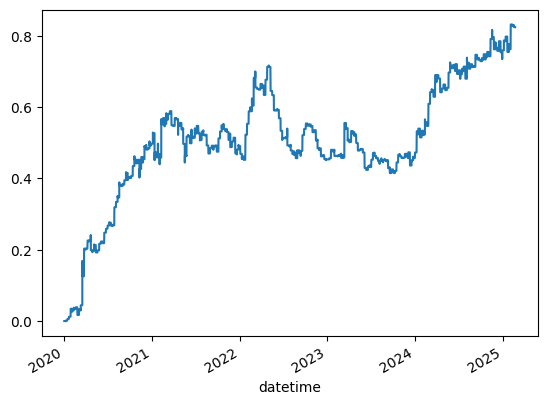

In [140]:
portfolio_returns = (portfolio_ser / portfolio_ser.shift() - 1)
portfolio_returns.cumsum().plot()

In [141]:
portfolio_returns.mean() / portfolio_returns.std()

0.01856852216238378

###########################################################################

Week-to-week change in returns -- probably no pattern